# European Call Option Pricing

## Import Libraries

In [1]:
import numpy as np
from scipy.stats import norm
import sys
import datetime
import seaborn as sns 
import pandas as pd
from pandas_datareader import data as web
from GBM_returns import *
from BSM_option_valuation import *
from BSM_imp_vol import *
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from tabulate import tabulate

mpl.rcParams['font.family'] = 'serif'
sys.path.append('05_com')

D:\Users\ivans\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Market-Based Valuation Model

For a European call option on an index with strike and index level above the strike price (in-the-money) at maturity, the option holder receives the difference from option writer.

If the index level is below the strike, the option expires worless (out-of-the-money) at maturity, the option holder do not have to pay anything.

- in-the-money (ITM): a call(put) if S > K (S < K)
- at-the-money (ATM): a call(put) if S = K
- out-of-the-money (OTM): a call(put) if S < K (S > K)

In [2]:
def mbvaluation(K, min, max, n):
    S = np.linspace(min, max, n)  # index level values
    h = np.maximum(S - K, 0)      # inner values of call option
    
    # Graphical Output
    plt.figure(figsize=(7,5))
    plt.plot(S, h, lw=2.5)        # plot inner values at maturity
    plt.title('Market-Based Valuation Model for call option')
    plt.xlabel('index level $S_t$ at maturity')
    plt.ylabel('inner value of European call option')
    plt.grid(True)

K: 12000
Min: 4000
Max: 12000
n: 100


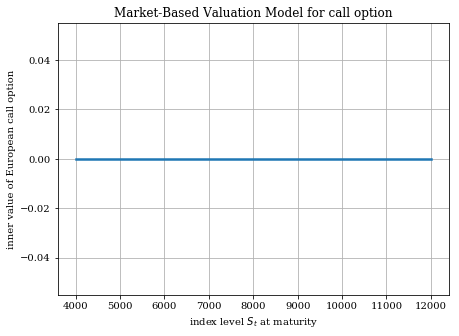

In [3]:
# input call option parameters:
K = (input("K: "))                            # strike
min = (input("Min: "))                        # min index level value
max = (input("Max: "))                        # max index level value
n= (input("n: "))                             # number of samples to generate.

mbvaluation(K, min, max, n)

## European call option price- Market-Based Valuation Model

In [4]:
def mbvaluation(S, K):
    return np.maximum(S - K, 0)

In [5]:
# input call option parameters:
K = (input("K: "))               # strike price
S = (input("S: "))               # spot price

mbvaluation(S, K)

K: 8000
S: 12000.


4000.0

For a Euporan call option on an index with strike 8,000 and index level of 12,000, The option holder receives the difference of 4,000 from the option writer.

## Black-Scholes-Merton (BSM) model

The Black-Scholes-Merton model is a model of price variation over time of financial instruments and often be used to determine the price of a European call option. The persent value of the option is always above the (undiscounted) inner value. In this sense, the option's present value is composed of the inner value plus time value.

In [6]:
def bs_price(K, min, max, n, T, r, sigma):
    S = np.linspace(min, max, n)                                # index level values
    h = np.maximum(S - K, 0)                                    # inner values of call option
    C = [BSM_call_value(St, K, T, r, sigma) for St in S]        # calculate call option values using BSM model
    
    # Graphical Output
    plt.figure()
    plt.plot(S, h, 'b-', lw=2.5, label = 'inner value')         # plot inner values at maturity
    plt.plot(S, C, 'r-.', lw=2.5, label = 'present value')      # plot option present value
    plt.grid(True)
    plt.legend(loc=0)
    plt.title('Black-Scholes-Merton(BSM) pricing for ')
    plt.xlabel('index level $S_0$')
    plt.ylabel('present value $C(t=0)$')

r: 0.01
sigma: 0.05
K: 8000
Min: 4000
Max: 12000
T: 10
n: 100


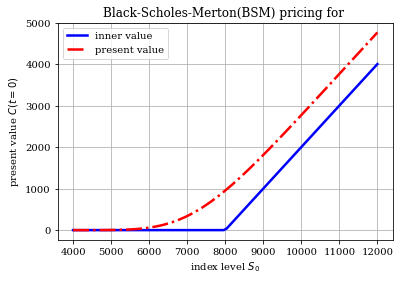

In [7]:
# input call option parameters:
r = (input("r: "))                            # risk-free rate
sigma = (input("sigma: "))                    # constant volatility
K = (input("K: "))                            # strike price
min = (input("Min: "))                        # min index level value
max = (input("Max: "))                        # max index level value
T= (input("T: "))                             # number of descrete time steps till maturity
n= (input("n: "))                             # number of samples to generate.


bs_price(K, min, max, n, T, r, sigma)

## European call option price- BSM model

In [8]:
# input call option parameters:
r = (input("r: "))                   # risk-free rate
sigma = (input("sigma: "))           # constant volatility
K = (input("K: "))                   # strike price
St = (input("St: "))                 # spot at time 0
T= (input("T: "))                    # number of descrete time steps till maturity

print "------------------\n"
print "Option price with BS is:", BSM_call_value(St, K, T, r, sigma)

r: 0.01
sigma: 0.05
K: 8000
St: 12000.
T: 10
------------------

Option price with BS is: 4761.57610236621


For a Euporan call option on an index with strike 8,000 and index level of 12,000, the present value of the call option is about 4,762 under BSM model as the BSM model take the time value into accounts.

## Black-Scholes-Merton (BSM) model with geometric Brownian motion (GBM)

### Using historical DAX data for simulation 

DAX index is the German Stock Index is a total return index of 30 selected German blue chip stocks traded on the Frankfurt Stock Exchange. 

In [130]:
DAX = web.DataReader('^GDAXI', data_source='yahoo', start='01-01-2008', end='31-12-2017')
DAX.rename(columns={'Adj Close' : 'index'}, inplace=True)
DAX['returns']=np.log(DAX['index']/DAX['index'].shift(1))
DAX['rea_var']=252*np.cumsum(DAX['returns']**2)/np.arange(len(DAX))
DAX['rea_vol']=np.sqrt(DAX['rea_var'])
DAX=DAX.dropna()

In [131]:
DAX.head()

,High,Low,Open,Close,Volume,index,returns,rea_var,rea_vol
Date,,,,,,,,,
2008-01-03,7969.899902,7858.390137,7941.520020,7908.410156,128154400.0,7908.410156,-0.005133,0.006640,0.081487
2008-01-04,7914.700195,7780.270020,7913.529785,7808.689941,180875100.0,7808.689941,-0.012690,0.023609,0.153653
2008-01-07,7858.640137,7781.680176,7810.819824,7817.169922,188030700.0,7817.169922,0.001085,0.015838,0.125851
2008-01-08,7923.439941,7831.509766,7844.500000,7849.990234,186940800.0,7849.990234,0.004190,0.012985,0.113950
2008-01-09,7841.620117,7770.419922,7839.229980,7782.709961,206848900.0,7782.709961,-0.008608,0.014122,0.118836


In [132]:
# Return Sample Statistics and Normality Test

def quotes_statistics(data):
    print "RETURN SAMPLE STATISTICS"
    print "---------------------------------"
    print "Mean of Daily Log Returns %9.6f" % np.mean(data['returns'])
    print "Std of Daily Log Returns %9.6f" % np.std(data['returns'])
    print "Mean of Annua. Log Returns %9.6f" % (np.mean(data['returns'])*252)
    print "Std of Annua. Log Returns %9.6f" % (np.std(data['returns'])*np.sqrt(252))
    print "---------------------------------"
    print "Skew of Sample Log Returns %9.6f" % scs.skew(data['returns'])
    print "Skew Normal Test p-value %9.6f" % scs.skewtest(data['returns'])[1]
    print "---------------------------------"
    print "Kurt of Sample Log Return %9.6f" % scs.kurtosis(data['returns'])
    print "Kurt Normal Test p-value %9.6f" % scs.kurtosistest(data['returns'])[1]
    print "---------------------------------"
    print "Normal Test p-value %9.6f" % scs.normaltest(data['returns'])[1]
    print "---------------------------------"
    print "Realized Volatility %9.6f" % data['rea_vol'][-1]
    print "Realized Variance %9.6f" % data['rea_var'][-1]

#
# Grapraphical Output
#


# daily quotes and log returns
def quotes_returns(data):
    '''Plots quotes and returns.'''
    fig, axes = plt.subplots(2, 1, figsize=(9, 7))
    
    # Get the current axis out of the figure.
    ax = fig.gca()
    ax1 = axes[0]
    ax2 = axes[1]


    ax1.plot(data['index'])
    ax1.set_title('A single simulated path for daily index over a 10-year period')
    ax1.set_ylabel('daily quotes')
    ax1.grid(True)
    ax1.axis('tight')

    ax2.plot(data['returns'])
    ax2.set_title('Volatility of daily log returns over a 10-year period')
    ax2.set_ylabel('daily log returns')
    ax2.grid(True)
    ax2.axis('tight')
        
    
# histogram of annualized daily log returns
def return_histogram(data):
    '''Plots a histogram of the returns'''
    plt.figure(figsize=(9, 5))
    x = np.linspace(np.min(data['returns']), np.max(data['returns']), 100 )
    plt.hist(np.array(data['returns']), bins=50, normed=True)
    y = norm.pdf(x, np.mean(data['returns']), np.std(data['returns']))
    plt.plot(x, y, linewidth=2)
    plt.title('The histogram of log return')
    plt.xlabel('log return')
    plt.ylabel('frequency/ probability')
    plt.grid(True)

#Q-Q plot of annualized daily log returns
def return_qqplot(data):
    '''Generates a Q-Qplot of the daily log returns'''
    plt.figure(figsize=(9, 5))
    sm.qqplot(data['returns'], line='s')
    plt.grid(True)
    plt.title('Q-Qplot of log return')
    plt.xlabel('theoretical quantile')
    plt.ylabel('sample quantiles')


# realized volatility
def realized_volatility(data):
    '''Plots the realized volatility.'''
    plt.figure(figsize=(9, 5))
    data['rea_vol'].plot()
    plt.title('Realized volatility for the simulated path')
    plt.ylabel('realized volatility')
    plt.grid(True)
    
    
# mean return, volatility and correlation (252 days moving = 1 year)
def rolling_statistics(data):
    '''Calculates and plots rollings statistics (mean, std, correlation).'''
    
    fig, axes = plt.subplots(3, 1, figsize=(9, 10))
    
    # Get the current axis out of the figure.
    ax = fig.gca()
    ax3 = axes[0]
    ax4 = axes[1]
    ax5 = axes[2]

    mr = pd.rolling_mean(data['returns'], 252)*252
    ax3.plot(mr)
    ax3.grid(True)
    ax3.set_title('Rolling mean of log return (252 days)')
    ax3.set_ylabel('returns(252d)')
    ax3.axhline(mr.mean(), color='r', ls= 'dashed', lw=1.5)

    vo = pd.rolling_std(data['returns'], 252)*np.sqrt(252)
    ax4.plot(vo)
    ax4.grid(True)
    ax4.set_title('Rolling volatility of log return (252 days)')
    ax4.set_ylabel('volatility (252d)')
    ax4.axhline(vo.mean(), color='r', ls='dashed', lw=1.5)
    vx=ax4.axis()

    corr=pd.rolling_corr(mr, vo, 252)
    ax5.plot(corr)
    ax5.grid(True)
    ax5.set_title('Rolling correlation of log return (252 days)')
    cx=ax5.axis()
    ax5.axis([vx[0], vx[1], cx[2], cx[3]])
    ax5.axhline(corr.mean(), color='r', ls='dashed', lw=1.5)
    print 'The average correlation', corr.mean()

In [134]:
quotes_statistics(DAX)

RETURN SAMPLE STATISTICS
---------------------------------
Mean of Daily Log Returns  0.000191
Std of Daily Log Returns  0.014587
Mean of Annua. Log Returns  0.048247
Std of Annua. Log Returns  0.231556
---------------------------------
Skew of Sample Log Returns -0.009799
Skew Normal Test p-value  0.839882
---------------------------------
Kurt of Sample Log Return  5.869563
Kurt Normal Test p-value  0.000000
---------------------------------
Normal Test p-value  0.000000
---------------------------------
Realized Volatility  0.231576
Realized Variance  0.053627


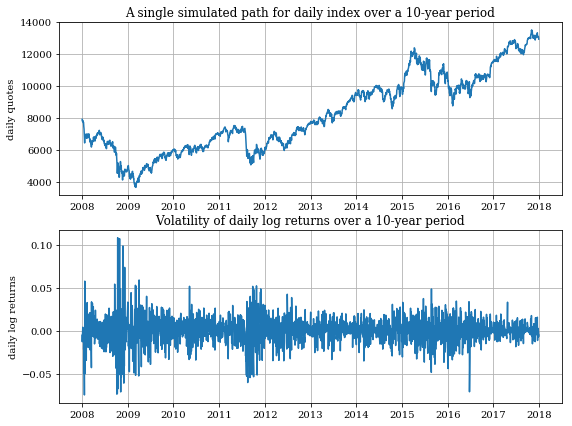

In [135]:
quotes_returns(DAX)

The DAX index showed an upward trend generally over the past 10 years. However, we could see a sharp decrease in during the finanancial crisis from 2008 to 2009 and European debt crisis from 2011 to 2012.

As we could also see that the daily log returns have greater volatility during the downward period. 

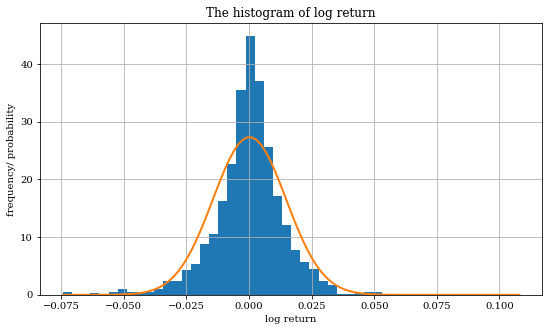

In [136]:
return_histogram(DAX)

The histrogram shows the frequency of daily log returns and compares these to a normal distribution. The fit seems good.

Besides, the skewness is almost zero and the high p-value of the normal skewness test indicates that the distribution of the log returns is normal.

<Figure size 648x360 with 0 Axes>

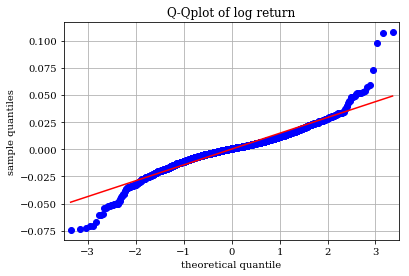

In [137]:
return_qqplot(DAX)

The quantile-quantile plot showed the normality of the returns. The graph illustrates well the deviation from the normal distribution.

The realized volatility is about 23.1% and the 0 p-value indicates strong evidences against the null hypothesis that "the sample distribution is normal". Beside the impression about the kurtosis is also supported by the high value of 5.9 which means we have fat tails

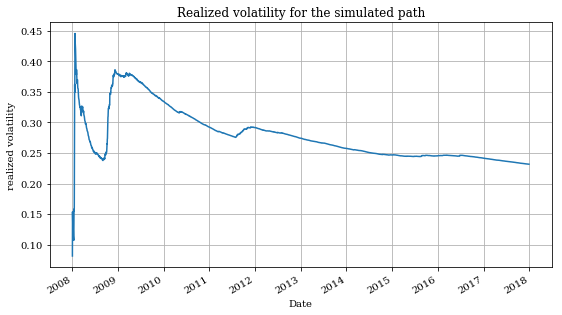

In [138]:
realized_volatility(DAX)

The graph showed the evolution of reailzed volatility over time and that it does not seem to converge. In the beginning, it goes down to below 10% then rises again to about 45% to drop and rise again. This provides further evidence that volatility is time varying.

D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:97: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).mean()
D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:104: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()
D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:112: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252).corr(other=<Series>)


The average correlation -0.398538190316


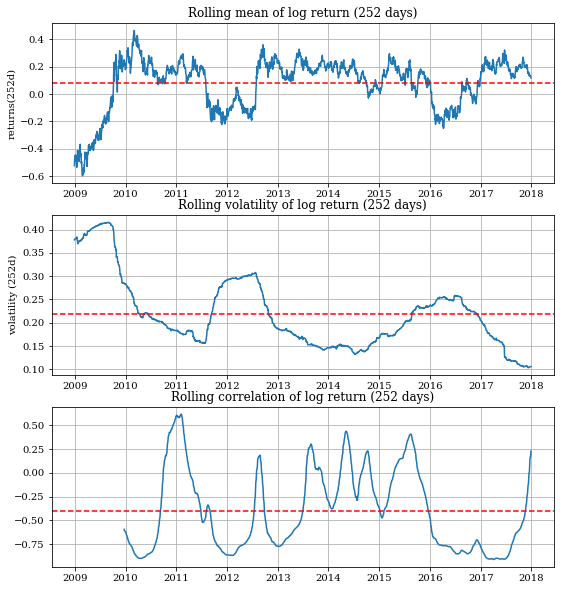

In [139]:
rolling_statistics(DAX)

The figure shows the rolling mean return and the rolling volatility for the time windows of 252 days and the rolling correlation between the two over a time window of a time window of same lenght. 

This measure varies between 10% and about 40%. This holds true for both deviations from the average and with respect to the difference between maxima and minima. Nevertheless, volatility obviously is mean reverting.

The yearly rolling correlation varies strongly taking almost extreme values in regular cycles. The average correlation is about -40%

In [25]:
# Pricing Data
pdate = pd.Timestamp('30-04-2014')

#
# EURO STOXX 50 index data
#

# URL of data file
es_url = 'http://www.stoxx.com/download/historical_values/hbrbcpe.txt'
# column names to be used
cols = ['Date','SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF', 'SXXA', 'DK5F', 'DKXF', 'DEL']
# reading the data with pandas
es = pd.read_csv(es_url, #filename
                 header=None,
                 index_col=0,
                 parse_dates=True,
                 dayfirst=True,
                 skiprows=4,
                 sep=';', 
                 names=cols)

# deleting the helper column
del es['DEL']
S0 = es['SX5E']['30-04-2014']
r = -0.05

#
# Option Data
#

data =pd.HDFStore('./es50_option_data.h5', 'r')['data']

#
# BSM Implied Volatilities
#

def calculate_imp_vols(data):
    '''Calculate all implied volatities for the European call option'''
    data['Imp_Vol'] = 0.0
    tol = 0.30
    for row in data.index:
        t = data['Date'][row]
        M = data['Maturity'][row]
        ttm = (M-t).days / 365.
        forward = np.exp(r*ttm)*S0
        if (abs(data['Strike'][row]-forward)/forward)< tol:
            call = call_option(S0, data['Strike'][row], t, M, r, 0.2)
            data['Imp_Vol'][row] = call.imp_vol(data['Call'][row])
    return data

#
# Graphical Output
#
markers = ['.', 'o', '^', 'v', 'x', 'D', 'd', '>', '<']
def plot_imp_vols(data):
    '''Plot the implied volatilites'''
    maturities = sorted(set(data['Maturity']))
    plt.figure(figsize=(10, 5))
    
    for i, mat in enumerate(maturities):
        dat = data[(data['Maturity']==mat) & (data['Imp_Vol'] > 0)]
        plt.plot(dat['Strike'].values, dat['Imp_Vol'].values, 'b%s' % markers[i], label=str(mat)[:10])
        
    plt.grid()
    plt.legend()
    plt.xlabel('strike')
    plt.ylabel('implied volatility')

In [26]:
calculate_imp_vols(data).tail()

BSM_imp_vol.py:47: RuntimeWarning: divide by zero encountered in divide
  d1 = ((np.log(self.S0/self.K)) + (self.r+0.5*self.sigma **2)*self.T)/(self.sigma*np.sqrt(self.T))
BSM_imp_vol.py:48: RuntimeWarning: divide by zero encountered in divide
  d2 = ((np.log(self.S0/self.K)+(self.r-0.5*self.sigma**2)*self.T)/(self.sigma*np.sqrt(self.T)))
D:\Users\ivans\Anaconda2\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Strike,Call,Maturity,Put,Imp_Vol
498,2014-09-30,3750.0,27.4,2015-09-18,635.9,0.2
499,2014-09-30,3800.0,21.8,2015-09-18,680.3,0.2
500,2014-09-30,3850.0,17.2,2015-09-18,725.7,0.2
501,2014-09-30,3900.0,13.4,2015-09-18,772.0,0.2
502,2014-09-30,3950.0,10.4,2015-09-18,818.9,0.2


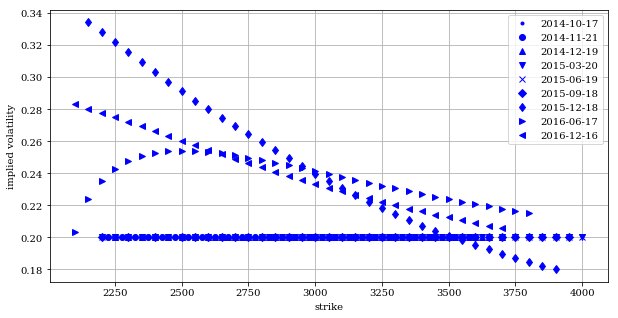

In [27]:
plot_imp_vols(data)

## Monte Carlo Simulation

The Monte Carlo Simulation is a probability distribution technique used to understand the impact of risk and uncertainty in financial, project management, cost, and other forecasting models. It calculates results over and over, each time using a different set of random values from the probability functions. Pricing the financial dervative such as European Call Option can be broadly split into finding expectations analytically or via a simulation.

In [28]:
def mcprice(n, r, sigma, K, St, T):

    disc = np.exp(-r*T)  
    vol = sigma*np.sqrt(T)
    
    # simulate N terminal prices by using normal distribution
    rands=np.random.normal(size=n)
    
    # calculate price analytically using Monte Carlo Simulation
    ST=St*np.exp((r-0.5*sigma*sigma)*T + vol*rands)
    payoff = np.multiply([p if p > 0 else 0 for p in ST-K], disc)   #inner value
    MCprice = np.mean(payoff,axis=0)
    print "----------------\n"
    print "Option price with MC is:", MCprice
    
    #Plot the Histogram of terminate price using Monte Carlo Probabilistic Simulation
    ax = sns.distplot(payoff, kde=True, color='red', bins=30)
    ax.set_title("Probability density of call option price using Monte Carlo Simulation", fontsize=15)
    ax.set(xlabel='price', ylabel='posibilities')
    return ax


n: 100
r: 0.01
Sigma: 0.05
K: 8000
St: 12000.
T: 10
----------------

Option price with MC is: 4685.931680071564


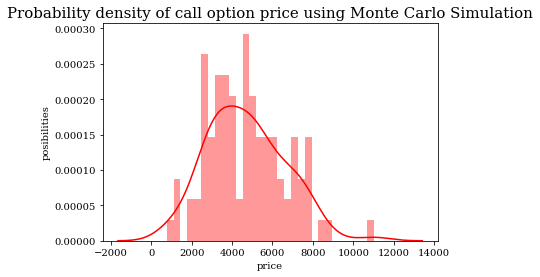

In [29]:
# input call option parameters:
n = (input("n: "))                            # number of seed
r = (input("r: "))                            # risk-free rate
sigma = (input("Sigma: "))                    # constant volatility
K = (input("K: "))                            # strike
St = (input("St: "))                          # spot at time 0
T= (input("T: "))                             # number of descrete time steps till maturity


mcprice(n, r, sigma, K, St, T)